# import library

In [1]:
# Imports
import numpy as np
import librosa
import IPython.display as ipd
import os, sys, datetime
from alignment_tool import *
import matplotlib.pyplot as plt
%matplotlib inline

# show version info
print ("[info] Current Time:     " + datetime.datetime.now().strftime('%Y/%m/%d  %H:%M:%S'))
print ("[info] Python Version:   " + sys.version.split('\n')[0].split(' ')[0])
print ("[info] Working Dir:      " + os.getcwd()+'/')
#print ("[info] Tensorflow:       " + tf.__version__)

[info] Current Time:     2020/10/28  15:54:04
[info] Python Version:   3.6.9
[info] Working Dir:      /host/home/python/python3/drum_transcription_website/


# load audio pair

In [2]:
audio_fname = './audio_files/mix_audio_00000_TRRORHF128E0786C6F.mp3'   # test audio candidate 1
#audio_fname = './audio_files/mix_audio_00997_TRCXFPD128C7196A52.mp3'   # test audio candidate 2

samp_rate = AUDIO_FS
audio_data, sr = librosa.load(audio_fname, sr=samp_rate, mono=False)
print ('[info] audio length: {} sec.'.format(audio_data.shape[1]/samp_rate))

print ('')
real_audio = audio_data[0,:]
midi_audio = audio_data[1,:]

print ('[info] mixed audio:')
ipd.display(ipd.Audio(audio_data, rate=samp_rate))
print ('[info] real-world audio:')
ipd.display(ipd.Audio(real_audio, rate=samp_rate))
print ('[info] MIDI synthesized audio:')
ipd.display(ipd.Audio(midi_audio, rate=samp_rate))

[info] audio length: 25.56 sec.

[info] mixed audio:


[info] real-world audio:


[info] MIDI synthesized audio:


# obtain CQT feature

[info] real audio cqt feature: (2131, 48)
[info] MIDI cqt feature: (2131, 48)
[info] frame hop size: 12.000 ms


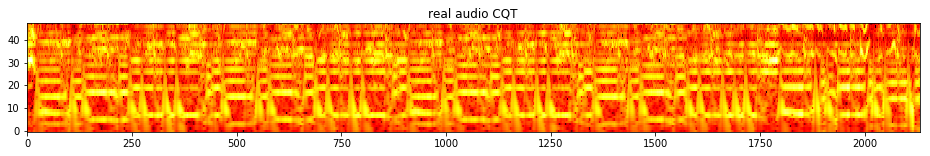

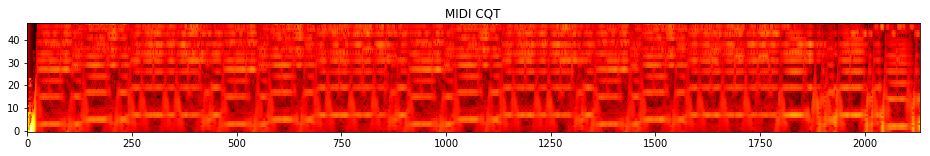

In [3]:
real_audio_cqt = get_cqt_by_adata(real_audio)
midi_audio_cqt = get_cqt_by_adata(midi_audio)

print ('[info] real audio cqt feature: {}'.format(real_audio_cqt.shape))
print ('[info] MIDI cqt feature: {}'.format(midi_audio_cqt.shape))
print ('[info] frame hop size: {:5.3f} ms'.format(1000 * AUDIO_HOP/samp_rate))


plt.figure(figsize=(16,2))
plt.imshow(real_audio_cqt.T, origin='lower', cmap='hot', aspect='auto')
plt.title('real audio CQT')
plt.show()
plt.figure(figsize=(16,2))
plt.imshow(midi_audio_cqt.T, origin='lower', cmap='hot', aspect='auto')
plt.title('MIDI CQT')
plt.show()

# calculate alignment path with different penalty

In [4]:
# define processing parameters
penalty_list = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
gully = 0.95

mid_mp3_dtw_result_list = []

for penalty in penalty_list:

    mid_idx, mp3_idx, dtw_score = alignment_func(midi_audio_cqt,
                                                 real_audio_cqt,
                                                 penalty,
                                                 gully)

    mid_mp3_dtw_result_list.append([mid_idx, 
                                    mp3_idx, 
                                    penalty,
                                    dtw_score])
    
print ('[info] path calculation done.')

[info] path calculation done.


# search for lowest panelty value

[info] bad path, penalty: 0.0, DTW score: 0.4565


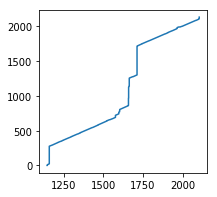

[info] good path, penalty: 0.1, DTW score: 0.5071


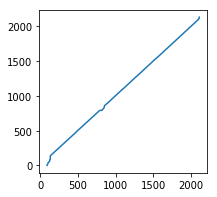



[info] lowest penalty value to obtain a valid path: 0.1


In [5]:
for plot_idx in range(10):
    
    mid_idx, mp3_idx, pen_v, dtw_score = mid_mp3_dtw_result_list[plot_idx]
    
    if check_path_validity(mid_idx, mp3_idx):
        print ('[info] good path, penalty: {}, DTW score: {:6.4f}'.format(pen_v, dtw_score))
    else:
        print ('[info] bad path, penalty: {}, DTW score: {:6.4f}'.format(pen_v, dtw_score))
        
    plt.figure(figsize=(3,3))
    plt.plot(mid_idx,mp3_idx)
    plt.show()
    
    if check_path_validity(mid_idx, mp3_idx):
        print ('\n\n[info] lowest penalty value to obtain a valid path: {:3.1f}'.format(pen_v))
        break